In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [46]:
df.head(5)
df.shape

(3285, 5)

С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [42]:
# ваш код
df["Day"] = pd.to_datetime(df["Day"])
df["year"] = df["Day"].dt.year
df["month"] = df["Day"].dt.month
df["day"] = df["Day"].dt.day

mean = df.groupby(['year']).mean().sort_values(by="t")
min_year = mean.head(1).index[0]
max_year = mean.tail(1).index[0]
print(f"In {max_year} t was max\nIn {min_year} t was min")

In 2015 t was max
In 2012 t was min


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [56]:
# ваш код
df_2 = df[(df["month"] == 1) & (df["t"] > 0)]
df_jan = df_2.groupby(["year"]).count().sort_values(by="t", ascending = False)
warm_jan = mean.head(1).index[0]
print(warm_jan)

2012


**3.** В каком году было самое холодное лето (по средней температуре)

In [61]:
# ваш код
df_3 = df[(df["month"] >= 6) & (df["month"] <= 8)]
mean_summer = df_3.groupby(["year"]).mean().sort_values(by = "t")
cold_summer = mean_summer.head(1).index[0]
cold_summer

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [64]:
# ваш код
import numpy as np
temp = list(df.t)
next_t = np.array(temp[1:])
temp = np.array(temp[:-1])

res = abs(next_t - temp)

In [83]:
ans = np.argmax(res)
print(f"{pd.to_datetime(df.iloc[ans, 0])} t was {temp[ans]} but {pd.to_datetime(df.iloc[ans + 1, 0])} t was {next_t[ans]}")
print(pd.to_datetime(df.iloc[ans, 0]))

2014-05-26 00:00:00 t was 22 but 2014-05-27 00:00:00 t was 7
2014-05-26 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='year'>

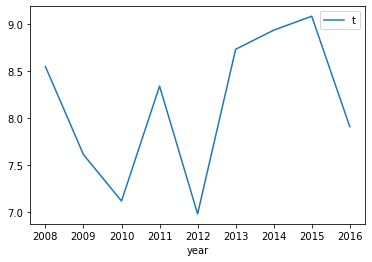

In [94]:
# ваш код
mean_year = df.groupby("year").mean()
mean_year = mean_year.reset_index()
mean_year.plot(x = "year", y = "t")